# KNN

## Import libraries

In [1]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [2]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from seaborn import violinplot
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

In [3]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.paths import references_dir

from src.utils.metrics import display_and_plot_all_metrics


## Set up

In [4]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [5]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_FINAL_CSV_PATH = data_dir("processed", "df_wine_final.csv")

print(f"{WINES_FINAL_CSV_PATH}")

c:\Users\cvigo\data-projects\proyecto-final-vinos\vinos-corderhouse\data\processed\df_wine_final.csv


In [6]:
df_wines = pd.read_csv(WINES_FINAL_CSV_PATH)

In [7]:
df_wines.sample(10)

,PC1,PC2,PC5,PC6,PC7,quality_low,style
4444,0.608178,0.181646,-0.216897,0.139266,0.192564,1,1
1984,-0.493361,-0.082602,-0.106716,0.268976,0.280939,0,1
1589,-0.173619,-0.102162,0.078877,-0.189635,-0.156754,1,1
3835,-0.552202,-0.196707,-0.106206,0.094353,-0.107948,0,1
640,-0.223817,0.362085,0.272118,0.057305,-0.180398,0,2
5001,0.425560,-0.080583,0.147964,-0.027604,0.256757,0,1
3158,0.716869,0.118953,-0.104467,0.063156,-0.053348,1,1
2268,-0.222323,-0.131791,0.229164,0.025161,0.014654,0,1
3264,0.030193,-0.081997,0.038200,0.190923,-0.139293,0,1
690,-0.287734,0.324773,0.250848,0.209502,-0.265437,0,2


# Preparamos los datos

In [8]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir
X = df_wines.drop(columns=["quality_low"])
y = df_wines.quality_low #Defino el Target

In [9]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [10]:
X_train.shape, X_test.shape

((3509, 6), (1504, 6))

# KNN

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
y_train_pred = knn.fit(X_train,y_train) 

In [12]:
y_test_pred = knn.predict(X_test) #Prediccion en Test

# Metricas

# Metricas: 

### Metricas calculadas

,roc_auc,accuracy,precision,f1,recall
value,0.78,0.75,0.62,0.6,0.58


### Grafico de confusion matrix: 

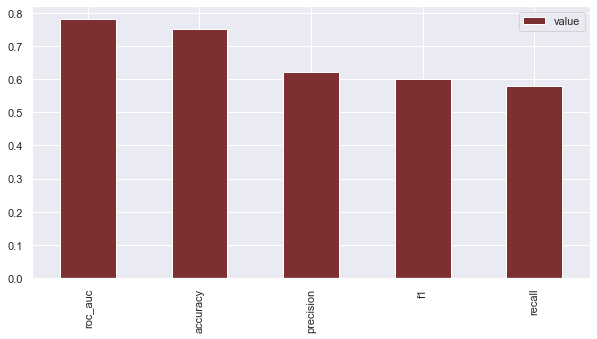

<Figure size 720x720 with 0 Axes>

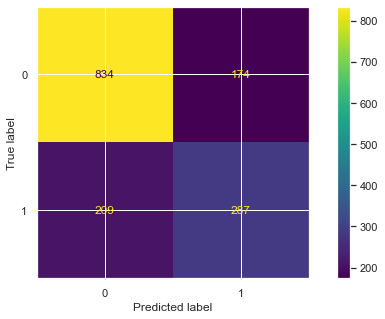

### Grafico de roc: 

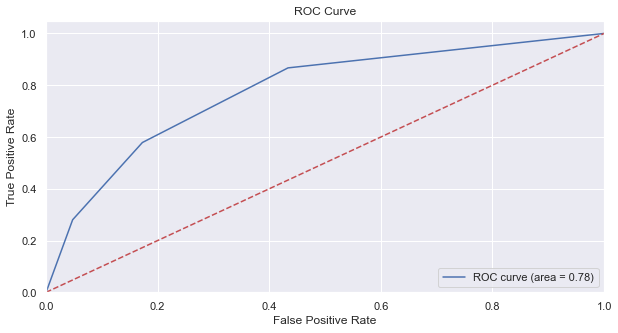

In [13]:
display_and_plot_all_metrics(knn,X_test,y_test,y_test_pred)

# Hypertuning de Parámetros

Utilizaremos Hypertuning de Parámetros para optimizar nuestro modelo de KNN. Sabemos que existen dos estrategías en esta busqueda (Grid Search y Random Search). En este caso vamos a utilizar la estrategía de Grid Search.

In [24]:
#Lista de parametros a probar
leaf_size = list(range(1,20))
n_neighbors = list(range(1,10))

In [15]:
# Convertimos la lista de parametros a un diccionario
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)#p=p

In [16]:
# creamos el modelo
knn_2 = KNeighborsClassifier()

In [17]:
# GridSearch
clf = GridSearchCV(knn_2, hyperparameters)

In [18]:
#Entrenamos el modelo 
best_model = clf.fit(X_train, y_train)

In [19]:
y_test_pred = clf.predict(X_test)

In [22]:
# Mostramos los mejores parametros
best_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

# Metricas: 

### Metricas calculadas

,roc_auc,accuracy,precision,f1,recall
value,0.8,0.75,0.63,0.6,0.57


### Grafico de confusion matrix: 

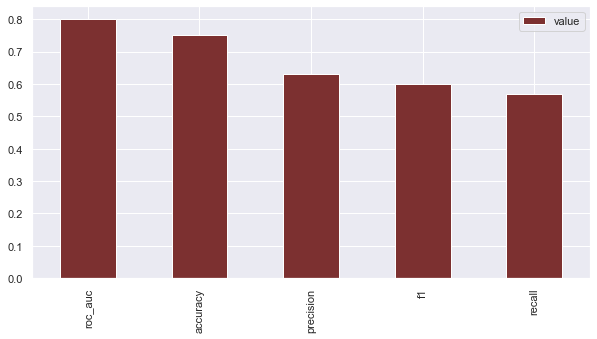

<Figure size 720x720 with 0 Axes>

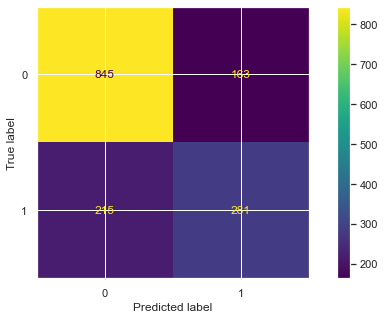

### Grafico de roc: 

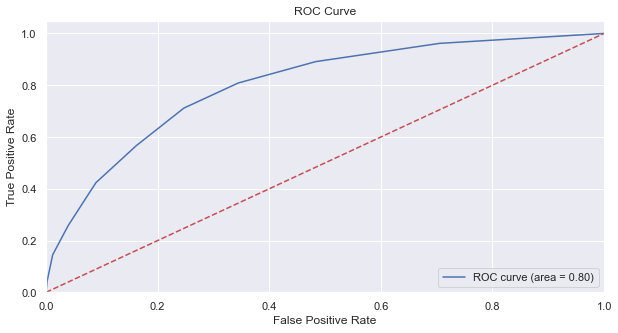

In [21]:
display_and_plot_all_metrics(clf,X_test,y_test,y_test_pred)

## Conclusión

Comparamos los resultados de ambos modelos:
- Bajaron los errores de Tipo1 de 174 a 163
- Subimos los errores de Tipo2 de 209 a 215
- Las metricas no cambiaron mucho, pero se puede ver un leve incremento en medidad del Auc roc, de 0.78 a 0.8

Si bien en algunos aspectos el algoritmo mejoro nuestra metrica, no es significativo.